## Keras Functional API
The Keras functional API provides a more flexible way for defining models.

It specifically allows you to define multiple input or output models as well as models that share layers. More than that, it allows you to define ad hoc acyclic network graphs.

Models are defined by creating instances of layers and connecting them directly to each other in pairs, then defining a Model that specifies the layers to act as the input and output to the model.

In [2]:
from keras.models import Model
from keras.layers import *

In [3]:
import tensorflow as tf
tf.test.is_gpu_available()

2025-03-12 17:57:59.268308: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /device:GPU:0 with 1732 MB memory:  -> device: 0, name: NVIDIA GeForce MX230, pci bus id: 0000:01:00.0, compute capability: 6.1


True

In [15]:
inputs = Input(shape=(3,))   # input has 3 columns
hidden1 = Dense(128, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)

output1 = Dense(1, activation='linear')(hidden2)
output2 = Dense(1, activation='sigmoid')(hidden2)

model = Model(inputs=inputs, outputs=[output1, output2])

In [16]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 dense_20 (Dense)            (None, 128)                  512       ['input_6[0][0]']             
                                                                                                  
 dense_21 (Dense)            (None, 64)                   8256      ['dense_20[0][0]']            
                                                                                                  
 dense_22 (Dense)            (None, 1)                    65        ['dense_21[0][0]']            
                                                                                            

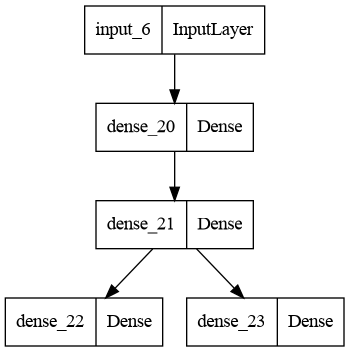

In [29]:
from keras.utils import plot_model
plot_model(model)

Preparing another architecture 

In [17]:
from keras.layers import Dense
inp1 = Input(shape=(32,))
inp2 = Input(shape=(128,))
hidden_11 = Dense(64, activation='relu')(inp1)
hidden_12 = Dense(32, activation='relu')(hidden_11)
hidden_13 = Dense(4, activation='relu')(hidden_12)
hidden_21 = Dense(8, activation='relu')(inp2)
hidden_22 = Dense(4, activation='relu')(hidden_21)
concat = concatenate([hidden_13, hidden_22])
hidden_3 = Dense(2, activation='relu')(concat)
output = Dense(1, activation='sigmoid')(hidden_3)

In [19]:
model2 = Model(inputs=[inp1, inp2], outputs=output)

In [20]:
model2.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 32)]                 0         []                            
                                                                                                  
 dense_24 (Dense)            (None, 64)                   2112      ['input_7[0][0]']             
                                                                                                  
 input_8 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 dense_25 (Dense)            (None, 32)                   2080      ['dense_24[0][0]']            
                                                                                            

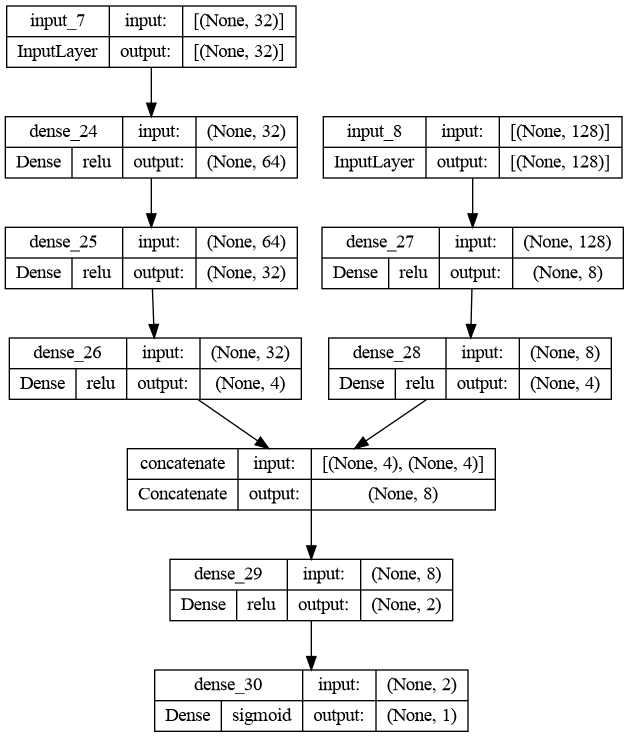

In [27]:
plot_model(model2, show_shapes=True, show_layer_names=True, show_layer_activations=True)

another architecture

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 61, 61, 32)           544       ['input_8[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 57, 57, 16)           1040      ['input_8[0][0]']             
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)           0         ['conv2d_2[0][0]']            
 g2D)                                                                                      

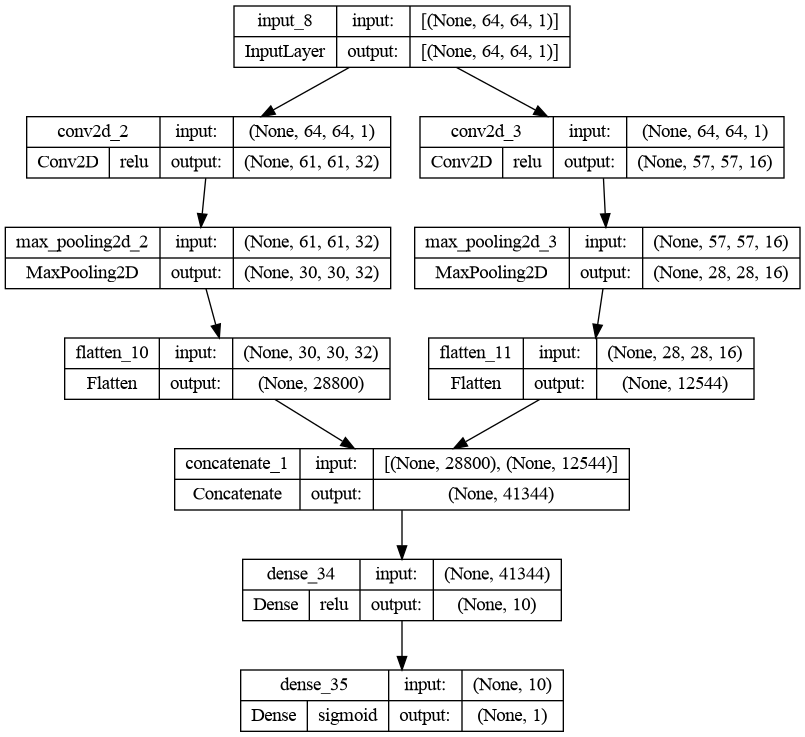

In [ ]:
visible = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)
conv2 = Conv2D(16, kernel_size=8, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)
merge = concatenate([flat1, flat2])
hidden1 = Dense(10, activation='relu')(merge)
output = Dense(1, activation='sigmoid')(hidden1)
model4 = Model(inputs=visible, outputs=output)
print(model4.summary())
plot_model(model4, show_layer_activations=True, show_shapes=True)

One more architecture

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 input_12 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 61, 61, 32)           544       ['input_11[0][0]']            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 29, 29, 32)           1568      ['input_12[0][0]']            
                                                                                           

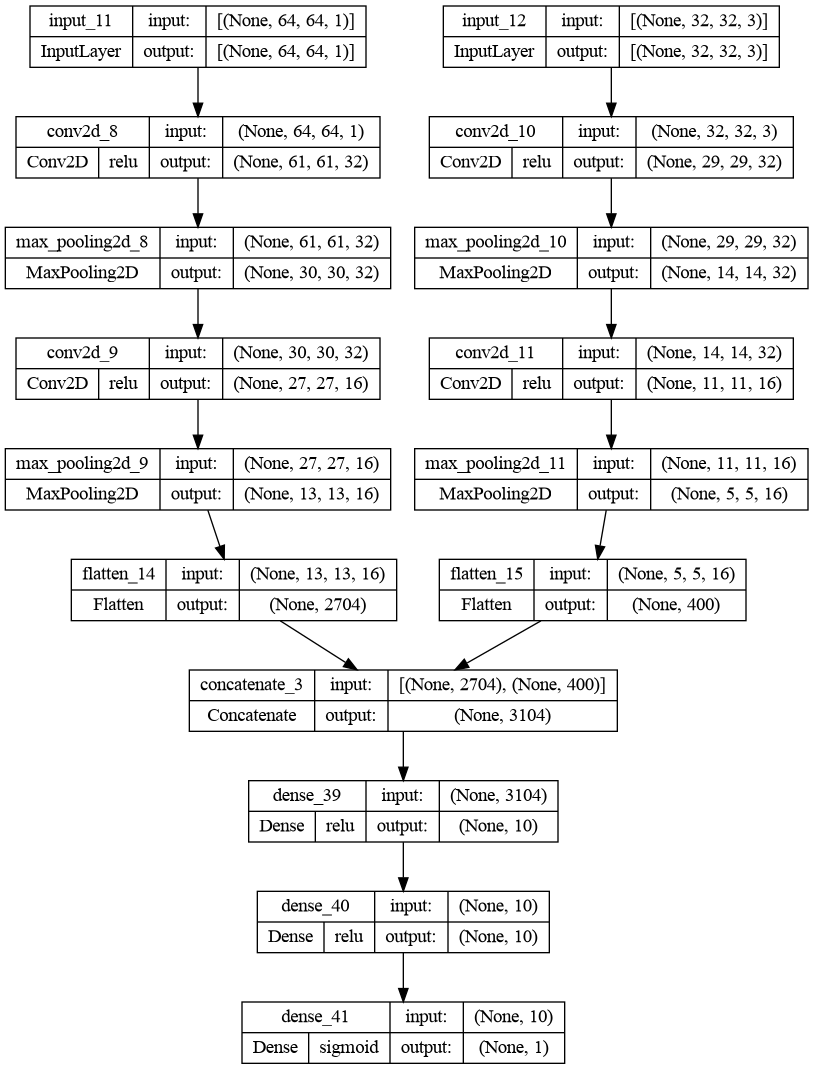

In [115]:
visible1 = Input(shape=(64,64,1))
conv11 = Conv2D(32, kernel_size=4, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)
# second input model
visible2 = Input(shape=(32,32,3))
conv21 = Conv2D(32, kernel_size=4, activation='relu')(visible2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)
# merge input models
merge = concatenate([flat1, flat2])
# interpretation model
hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model5 = Model(inputs=[visible1, visible2], outputs=output)
# summarize layers
print(model5.summary())
# plot graph
plot_model(model5,  show_layer_activations=True, show_shapes=True)

## Working on a problem with functional model

#### About the dataset
UTKFace dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, age progression/regression, landmark localization, etc. Some sample images are shown as following.

#### Highlights
* consists of 20k+ face images in the wild (only single face in one image)
* provides the correspondingly aligned and cropped faces
* provides the corresponding landmarks (68 points)
* images are labelled by age, gender, and ethnicity

#### Labels
The labels of each face image is embedded in the file name, formated like `[age]_[gender]_[race]_[date&time]`.jpg

* `[age]` is an integer from 0 to 116, indicating the age
* `[gender]` is either 0 (male) or 1 (female)
* `[race]` is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
* `[date&time]` is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace.

In [15]:
import kagglehub

try:
    path = kagglehub.dataset_download("jangedoo/utkface-new")
    print("Dataset downloaded successfully:", path)
except Exception as e:
    print("Error during download:", e)


Resuming download from 20971520 bytes (326371022 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/jangedoo/utkface-new?dataset_version_number=1 (20971520/347342542) bytes left.


100%|██████████| 331M/331M [00:31<00:00, 10.5MB/s] 

Extracting files...


Dataset downloaded successfully: /home/naman/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1


In [1]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

2025-03-13 00:34:25.966725: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-13 00:34:35.490546: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [60]:
path_dir = '/media/naman/NewVolume/Data_Science/Notebook/deep_learning/data/utkface-new/'

In [61]:
age = []
gender = []
img_path = []
for file in os.listdir(path_dir):
    age.append(int(file.split('_')[0]))
    gender.append(int(file.split('_')[1]))
    img_path.append(file)

In [62]:
data_ = pd.DataFrame({'age':age, 'gender':gender, 'img':img_path})

In [63]:
print("unique age values:" , data_['age'].sort_values().unique())
print("-"*100)
print("unique gender values:" , data_['gender'].unique())


unique age values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  95  96
  99 100 101 103 105 110 111 115 116]
----------------------------------------------------------------------------------------------------
unique gender values: [1 0]


In [64]:
data_.shape

(23708, 3)

In [65]:
train_data_label = data_.sample(frac = 1, random_state=42)[:20000]
test_data_label = data_.sample(frac = 1, random_state=42)[20000:]

In [66]:
print("train shape: ",train_data_label.shape, ", test shape: ", test_data_label.shape)

train shape:  (20000, 3) , test shape:  (3708, 3)


In [67]:
train_data_gen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range=0.2, 
    rotation_range=30, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True, 
    zoom_range=0.2)

test_data_gen = ImageDataGenerator(rescale=1./255)

In [40]:
train_ds = train_data_gen.flow_from_dataframe(
    train_data_label,
    directory=path_dir,
    x_col="img",
    y_col=["age", "gender"],
    target_size=(150, 150),
    class_mode="multi_output"
)

test_ds = test_data_gen.flow_from_dataframe(
    test_data_label,
    directory=path_dir,
    x_col="img",
    y_col=["age", "gender"],
    target_size=(150, 150),
    class_mode="multi_output"
)

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [68]:
from keras.applications.vgg16 import VGG16
from keras.layers import *
from keras.models import Model

In [69]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

In [70]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

Ending at convolution layer, and input size needed here is in dimension of `(224, 224, 3)`.

In [71]:
# creating a custom fully functional layer for resnet and the rest of the model freeze

vgg.trainable = False
input_ = vgg.layers[-1].output

In [72]:
input_

<KerasTensor: shape=(None, 4, 4, 512) dtype=float32 (created by layer 'block5_pool')>

In [73]:
# functional layers
flatten = Flatten()(input_)
dense1 = Dense(64, activation="relu")(flatten)
dense2 = Dense(32, activation="relu")(dense1)

dense3 = Dense(64, activation="relu")(flatten)
dense4 = Dense(32, activation="relu")(dense3)

output1 = Dense(1, activation="linear", name='age')(dense2)
output2 = Dense(1, activation="sigmoid", name='gender')(dense4)

In [74]:
vgg.input

<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'input_6')>

In [75]:
model = Model(inputs = vgg.input, outputs=[output1, output2])

In [76]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 150, 150, 64)         1792      ['input_6[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 150, 150, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)           0         ['block1_conv2[0][0]']        
                                                                                            

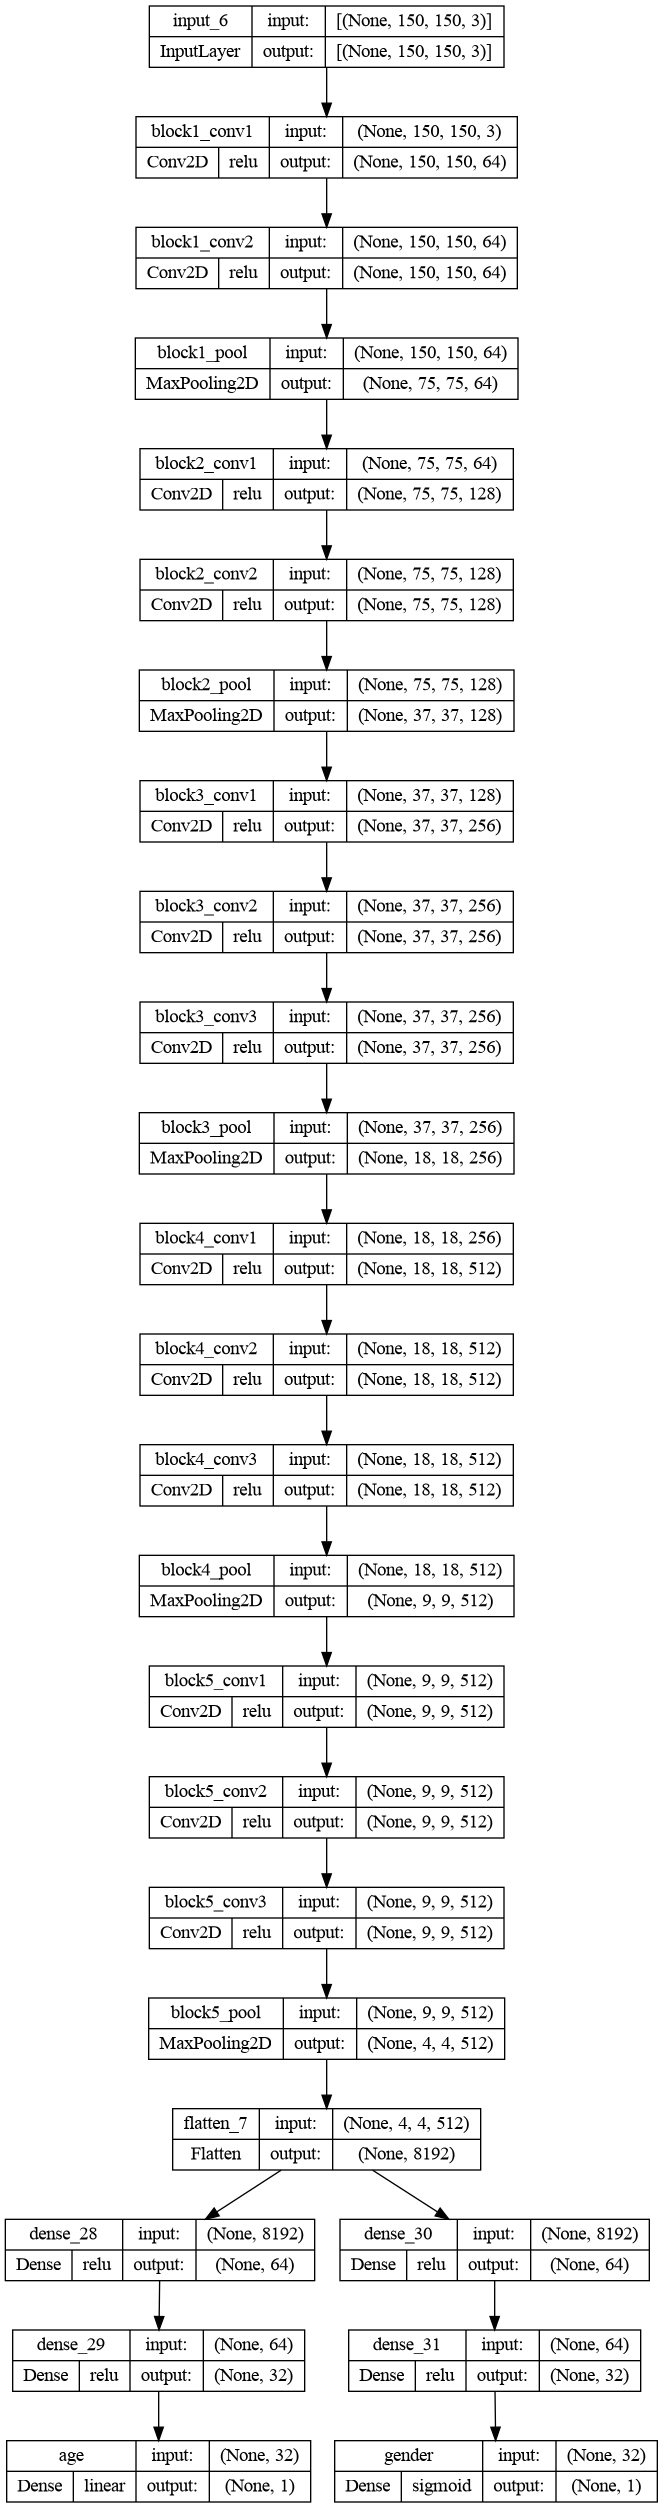

In [77]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_activations=True)

In [82]:
model.compile(
    optimizer="adam",
    loss={"age": "mse", "gender": "binary_crossentropy"},
    metrics={"age": "mape", "gender": "accuracy"},
    loss_weights={"age": 1, "gender": 10}
)

In [83]:
history = model.fit(train_ds, batch_size=32, epochs = 10, validation_data = test_ds)

Epoch 1/10
625/625 [==============================] - 345s 544ms/step - loss: 243.9001 - age_loss: 238.7652 - gender_loss: 0.5135 - age_mape: 135.2859 - gender_accuracy: 0.7409 - val_loss: 170.0447 - val_age_loss: 165.4974 - val_gender_loss: 0.4547 - val_age_mape: 104.1333 - val_gender_accuracy: 0.7770
Epoch 2/10
625/625 [==============================] - 429s 686ms/step - loss: 173.6775 - age_loss: 169.2702 - gender_loss: 0.4407 - age_mape: 99.9197 - gender_accuracy: 0.7961 - val_loss: 167.7606 - val_age_loss: 163.9168 - val_gender_loss: 0.3844 - val_age_mape: 82.6158 - val_gender_accuracy: 0.8293
Epoch 3/10
625/625 [==============================] - 453s 725ms/step - loss: 160.1291 - age_loss: 155.9362 - gender_loss: 0.4193 - age_mape: 88.5916 - gender_accuracy: 0.8045 - val_loss: 141.8132 - val_age_loss: 138.2832 - val_gender_loss: 0.3530 - val_age_mape: 71.4918 - val_gender_accuracy: 0.8363
Epoch 4/10
625/625 [==============================] - 456s 729ms/step - loss: 153.6159 - age

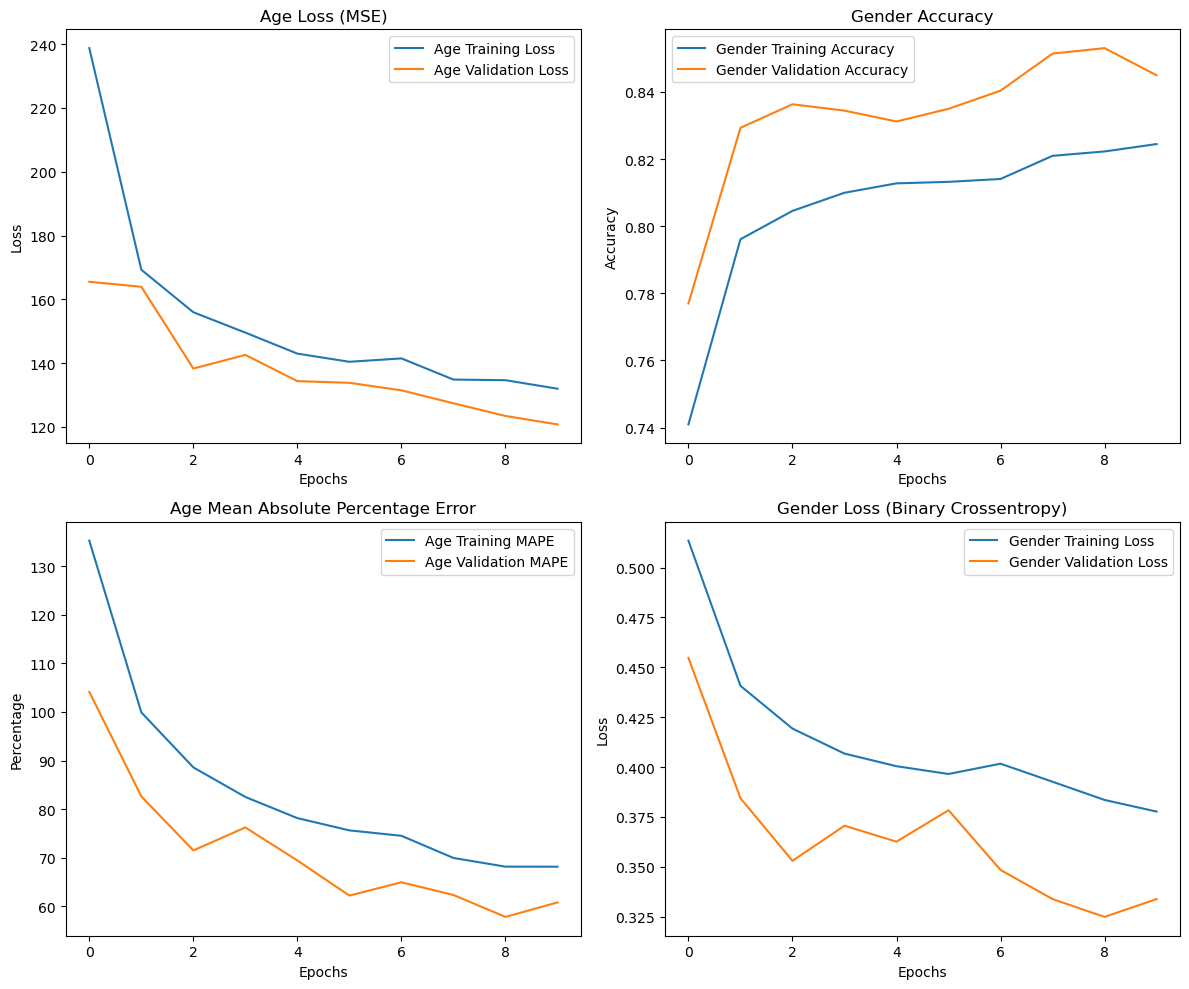

In [92]:
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Plot age loss (MSE)
ax[0, 0].plot(history.history["age_loss"], label="Age Training Loss")
ax[0, 0].plot(history.history["val_age_loss"], label="Age Validation Loss")
ax[0, 0].set_xlabel("Epochs")
ax[0, 0].set_ylabel("Loss")
ax[0, 0].set_title("Age Loss (MSE)")
ax[0, 0].legend()

# Plot gender accuracy
ax[0, 1].plot(history.history["gender_accuracy"], label="Gender Training Accuracy")
ax[0, 1].plot(history.history["val_gender_accuracy"], label="Gender Validation Accuracy")
ax[0, 1].set_xlabel("Epochs")
ax[0, 1].set_ylabel("Accuracy")
ax[0, 1].set_title("Gender Accuracy")
ax[0, 1].legend()

ax[1, 0].plot(history.history["age_mape"], label="Age Training MAPE")
ax[1, 0].plot(history.history["val_age_mape"], label="Age Validation MAPE")
ax[1, 0].set_xlabel("Epochs")
ax[1, 0].set_ylabel("Percentage")
ax[1, 0].set_title("Age Mean Absolute Percentage Error")
ax[1, 0].legend()


# Plot gender loss (Binary Crossentropy)
ax[1, 1].plot(history.history["gender_loss"], label="Gender Training Loss")
ax[1, 1].plot(history.history["val_gender_loss"], label="Gender Validation Loss")
ax[1, 1].set_xlabel("Epochs")
ax[1, 1].set_ylabel("Loss")
ax[1, 1].set_title("Gender Loss (Binary Crossentropy)")
ax[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

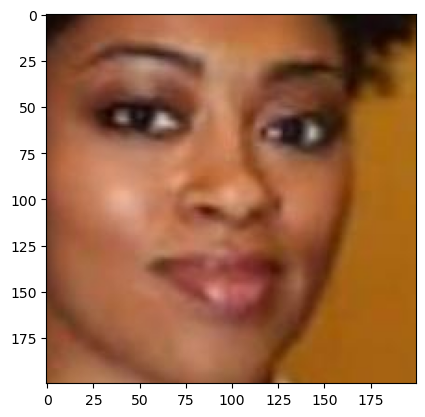

In [109]:
import skimage.io as io
an_img = io.imread("/media/naman/NewVolume/Data_Science/Notebook/deep_learning/data/utkface-new/35_1_1_20170112233419191.jpg.chip.jpg", )
plt.imshow(an_img)

In [110]:
import cv2
import numpy as np
an_img.shape
an_img = cv2.resize(an_img, (150,150))
an_img = np.expand_dims(an_img, axis = 0)

In [111]:
model.predict(an_img)

1/1 [==============================] - 0s 39ms/step


[array([[75.895134]], dtype=float32), array([[1.]], dtype=float32)]

Very bad output in age and above average output for gender class.